In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from affective_computing.get_pipe_data import get_pipe_data
import cv2
from affective_computing.point_cloud import FaceCloud

In [2]:
im_path = "sample_images/Happy_26.png"
# im_path = "Affective_Computing/Sample_Images/Ben Glasses.png"

# get image as RGB array
img_array = cv2.cvtColor(cv2.imread(im_path), cv2.COLOR_BGR2RGB)
# get image as mediapipe image
img_mp = mp.Image(data=img_array, image_format=mp.ImageFormat.SRGB)

base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options, output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True, num_faces=1, )
detector = vision.FaceLandmarker.create_from_options(options)
face_landmarks, blend_data, _ = get_pipe_data(detector, img_mp)

I0000 00:00:1708530129.404758       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2 Max
W0000 00:00:1708530129.405313       1 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
/Users/benhoskings/Documents/Pycharm/Hero_Monitor/venv/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


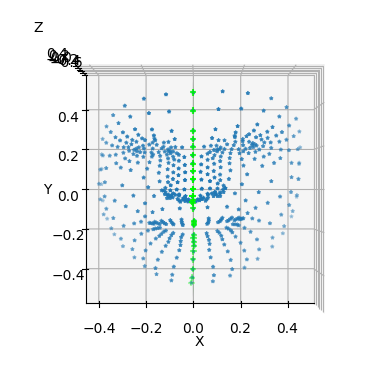

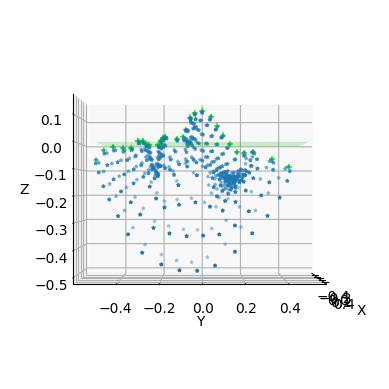

In [3]:
face = FaceCloud(face_landmarks)
face.preprocess(scale=True, demo=True)